# Sequential Model for Fashion Mnist Dataset

In [1]:

import streamlit as st
import matplotlib.pyplot as plt
from PIL import Image
import io
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
#########
#@ st.cache
fas_data=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fas_data.load_data()


############################## Class naming  #####################
class_names=['Tshit/TOP','Trouser','Pullover','Dress','Coat',
             'Sandel','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
import numpy as np
def explore_data(train_images,train_label,test_images):
    st.write('Train Images shape:',train_images.shape)
    st.write('Test images shape:',test_images.shape)
    #st.write(train_labels[0:20])
    st.write('Training Classes',len(np.unique(train_labels)))
    st.write('Testing Classes',len(np.unique(test_labels)))
if st.button("Explore Data"):
    explore_data(train_images,train_labels,test_images)
    
    

2024-09-21 08:55:00.046 
  command:

    streamlit run C:\Users\shree\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [5]:
# Data preprocessing
# input [0-255] require scaling in [0-1]
train_images=train_images/255.0
test_images=test_images/255.0
# target
train_l=keras.utils.to_categorical(train_labels,10) # 10 class
test_l=keras.utils.to_categorical(test_labels,10)

train_image=np.expand_dims(train_images,3)
test_image=np.expand_dims(test_images,3)
print(train_images.shape)
print(test_images.shape)
print(train_image.shape)
print(test_image.shape)
print(train_l.shape)



(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)


In [6]:
############# Select model 
model=keras.Sequential()
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) #28 x 28=784 x 1
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation='softmax'))


c:\Users\shree\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
#########3 model compilation ##### for sequential model
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])
hist=model.fit(train_images,train_l,epochs=10,verbose=1,validation_split=0.2)
    

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6950 - loss: 0.8592 - val_accuracy: 0.8446 - val_loss: 0.4329
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8456 - loss: 0.4364 - val_accuracy: 0.8612 - val_loss: 0.3886
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8600 - loss: 0.3910 - val_accuracy: 0.8567 - val_loss: 0.3940
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8696 - loss: 0.3627 - val_accuracy: 0.8733 - val_loss: 0.3689
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8786 - loss: 0.3368 - val_accuracy: 0.8763 - val_loss: 0.3432
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8841 - loss: 0.3157 - val_accuracy: 0.8789 - val_loss: 0.3345
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8884 - loss: 0.3071 - val_accuracy: 0.8817 - val_loss: 0.3335
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8949 - loss: 0.2914 - 

In [8]:
##
model.summary()
test_loss,test_acc=model.evaluate(test_images,test_l)
print(test_acc)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8792 - loss: 0.3457
0.8773000240325928


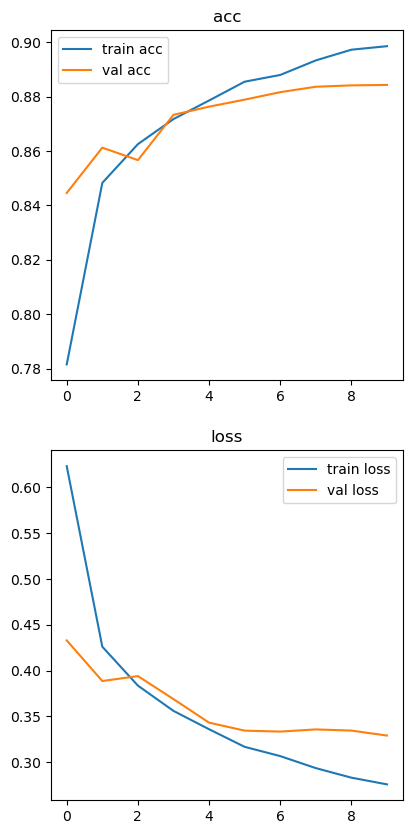

In [9]:
def history_graph():
    plt.figure(figsize=(10,10))
    train_acc=hist.history['accuracy']
    val_acc=hist.history['val_accuracy']
    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    plt.subplot(2,2,1)
    plt.plot(train_acc,label='train acc')
    plt.plot(val_acc,label='val acc')
    plt.legend()
    plt.title('acc')
    plt.subplot(2,2,3)
    plt.plot(train_loss,label='train loss')
    plt.plot(val_loss,label='val loss')
    plt.legend()
    plt.title('loss')
history_graph()

In [10]:
import pickle
with open('seq_trainHistory', 'wb') as file_pi:
        pickle.dump(hist.history, file_pi)

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)

In [12]:
model.save('Seq_model.h5')